##### Author contributions
Please fill out for each of the following parts who contributed to what:
- Conceived ideas: Everybody
- Performed math exercises: Everybody
- Performed programming exercises: Everybody
- Contributed to the overall final assignment: Everybody

Everybody did the assignment themselves and we voted afterwards for the one version to submit.

# Chapter 2
## The perceptron

    Hand-in bug-free (try "Kernel" > "Restart & Run All") and including all (textual as well as figural) output via Brightspace before the deadline (see Brightspace).
    
Learning goals:
1. Implement a perceptron. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

### Exercise 1: The activation function (1 point)
The perceptron uses the *linear threshold activation* function $g(\mathbf{x})$ with $\theta=0$. Write a function ```linear_threshold(x, theta)``` that computes this activation given any input $x$.

### Solution 1

In [ ]:
# The activation function
def linear_threshold(x, theta = 0):
  if x>=theta:
    return 1
  else:
    return 0

### Exercise 2: Perceptron output (1 point)
The output $y$ of a perceptron is given by $y=g(\mathbf{w}^\top \mathbf{x})$, with input vector $\mathbf{x}$, the weight vector $\mathbf{w}$, and the activation function $g$. Write a function ```compute_output(x,w)``` that computes the output of a perceptron, given a single pattern $\mathbf{x}$ and the current perceptron weights $\mathbf{w}$.

### Solution 2

In [ ]:
# Output of a perceptron
def compute_output(x,w):
  h_out = np.tensordot(w, x, (0,0))
  g_out = linear_threshold(h_out)
  return g_out

### Exercise 3: Weight update (1 point)
A perceptron is trained (i.e. it learns the right weights) following the perceptron convergence procedure. Write a function ```update_weights(w, x, y, t)``` that performs this procedure. Specifically, write a function that returns the updated perceptron weights following the rule from the lecture, given one input pattern $\mathbf{x}$, its target output $\mathbf{t}$, the current set of weights $\mathbf{w}$ and the (already calculated) output of the perceptron $\mathbf{y}$. 

You don't need to calculate the perceptron output $\mathbf{y}$ here, it will be calculated in the final perceptron training function with your ```compute_output()``` function. 

Hint: This is a very short function again. 

### Solution 3

In [ ]:
# Perceptron weight update
def update_weights(w, x, y, t):
  return w + (t - y) * x 

### Exercise 4: Training (1.5 points)
You now have implemented all the building blocks for a perceptron. Now, write a function ```perceptron_train(X, T, n_epochs)``` that trains and returns weights $\mathbf{w}$ for a perceptron, given a dataset $\mathbf{X}$ and targets $\mathbf{T}$.

`n` is the number of training examples. `m` is the number of weights. Expect $\mathbf{X}$ to be a matrix containing the training examples with dimensions `(m,n)` and $\mathbf{T}$ containing the targets for each example, a vector with length `n`.

It should train for 10 epochs (iterations over all training examples). Make use of `np.random.permutation` to avoid that you are always iterating over the examples in the same order. 

For now only implement ```perceptron_train(X, T, n_epochs)```. We will call and test it later. 

### Solution 4

In [ ]:
def perceptron_train(X, T, n_epochs=10):
    m, n = X.shape

    # Initialize the right number of weights as zeros
    w = np.zeros(m)

    # Loop over epochs
    for epoch in range(n_epochs):

        # Loop over all examples in random order
        for idx in np.random.permutation(range(n)):

            # Take an example
            x = X[:,idx]

            # Compute the output of the perceptron
            y = compute_output(x, w)

            # Update the weights of the perceptron
            w = update_weights(w, x, y, T[idx])

    return w

### Exercise 5: Testing (1.5 points)
In addition to the training function, write a function `perceptron_test(X,w)` that computes and returns the outputs $\mathbf{Y}$ for a given dataset $\mathbf{X}$ and a perceptron given by its weights $\mathbf{w}$. 

### Solution 5

In [ ]:
def perceptron_test(X, w):
    n = X.shape[1]
    
    # Create an output array Y that you use to store the perceptron outputs
    Y = []
    
    # Loop over the examples
    for idx in range(n):
    
        # Take an example
        x = X[:,idx]

        # Compute the output of the perceptron
        Y.append(compute_output(x, w))
    
    return Y

### Exercise 6: OR (1 point)
Use your functions to train and test a perceptron on the OR problem, given by input patterns $\mathbf{X}$ and targets $\mathbf{T}$. 

Print your trained perceptron's outputs $\mathbf{Y}$ and the expected outputs $\mathbf{T}$ for the OR problem  to check whether your perceptron has learned successfully. 

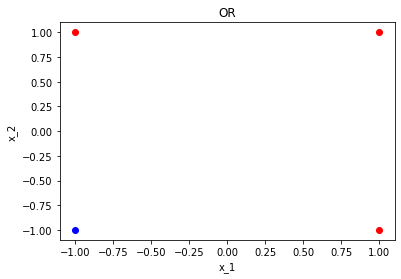

In [ ]:
# Inputs
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]], dtype="float32").T

# Targets
T = np.array([0, 1, 1, 1], dtype="float32")

# Plot data
plt.figure()
for i in range(X.shape[1]):
    if T[i] == 1:
        plt.plot(X[0, i], X[1, i], "or")
    else:
        plt.plot(X[0, i], X[1, i], "ob")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title("OR")

# Add bias terms
X = np.vstack((np.ones((1, X.shape[1])), X))

### Solution 6

In [ ]:
# Train the perceptron
w = perceptron_train(X, T, n_epochs=10)

# Apply the perceptron
Y = perceptron_test(X, w)

# Print predictions and targets
print(Y)
print(T)

[0, 1, 1, 1]
[0. 1. 1. 1.]


### Exercise 7: AND (1 point)
Train and test your perceptron on the AND problem, given by input patterns $\mathbf{X}$ and targets $\mathbf{T}$. 

Print your trained perceptron's outputs $\mathbf{Y}$ and the expected outputs for the AND problem $\mathbf{T}$ to check whether your perceptron has learned successfully. 

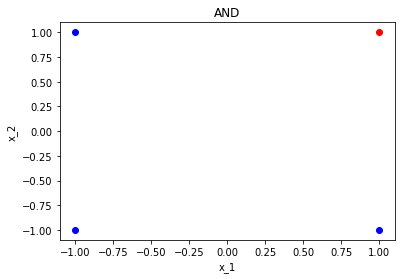

In [ ]:
# Inputs
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]], dtype="float32").T

# Targets
T = np.array([0, 0, 0, 1], dtype="float32")

# Plot data
plt.figure()
for i in range(X.shape[1]):
    if T[i] == 1:
        plt.plot(X[0, i], X[1, i], "or")
    else:
        plt.plot(X[0, i], X[1, i], "ob")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title("AND")

# Add bias terms
X = np.vstack((np.ones((1, X.shape[1])), X))

### Solution 7

In [ ]:
# Train the perceptron
w = perceptron_train(X, T, n_epochs=10)

# Apply the perceptron
Y = perceptron_test(X, w)
# Print predictions and targets

print(Y)
print(T)

[0, 0, 0, 1]
[0. 0. 0. 1.]


### Exercise 8: XOR (1 point)
Train and test your perceptron on the XOR problem, given by input patterns $\mathbf{X}$ and targets $\mathbf{T}$. 

Print your trained perceptron's outputs $\mathbf{Y}$ and the expected outputs for the XOR problem $\mathbf{T}$ to check whether your perceptron has learned successfully. 

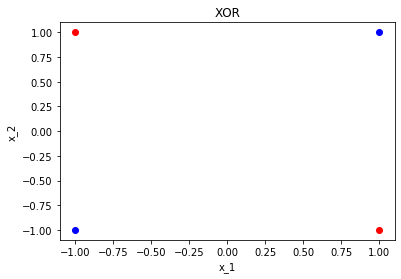

In [ ]:
# Inputs
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]], dtype="float32").T

# Targets
T = np.array([0, 1, 1, 0], dtype="float32")

# Plot data
plt.figure()
for i in range(X.shape[1]):
    if T[i] == 1:
        plt.plot(X[0, i], X[1, i], "or")
    else:
        plt.plot(X[0, i], X[1, i], "ob")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title("XOR")

# Add bias terms
X = np.vstack((np.ones((1, X.shape[1])), X))

### Solution 8

In [ ]:
# Train the perceptron
w = perceptron_train(X, T, n_epochs=10)

# Apply the perceptron
Y = perceptron_test(X, w)

# Print predictions and targets
print(Y)
print(T)

[1, 1, 1, 1]
[0. 1. 1. 0.]


### Exercise 9: Interpretation (1 point)

1. Which of the three problems OR, AND and XOR did the perceptron learn, and which did it not learn?
1. Which property do the patterns in $\mathbf{X}$ need to have so that the perceptron can learn them? 
1. Which of the three problems do or do not have this property?

### Solution 9

1. The perceptron learned OR and AND. It did not learn XOR.
1. The patterns in X need to be linearly seperable.
1. Only OR and AND are linearly separable.